In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plot_routines import plot_routines
from scipy.interpolate import interp1d
import seaborn

In [2]:
# Loading the data into a plotting tool class.
micro_path = '/home/jakob/Project_Divestment/PyDivestment/output_data/P3/micro/mean.h5'
macro_path = '/home/jakob/Project_Divestment/PyDivestment/output_data/P3/mean/mean.h5'
with pd.HDFStore(micro_path) as store:
    micro_data = store.select('dat', 'approximate=1 & test=False & sample=0 & eps=0.05')
with pd.HDFStore(macro_path) as store:
    macro_data = store.select('dat', 'approximate=2 & test=False & sample=0 & eps=0.05')
    
for df in [micro_data, macro_data]:
    df.index = df.index.droplevel(['approximate', 'test', 'sample', 'eps'])
    df.index.names = [r'$\tau$',r'$\phi$', 'tsteps']

In [3]:
macro_data.head()

c    g    mu_c^c    mu_c^d    mu_d^c    mu_d^d  \
$\tau$ $\phi$ tsteps                                                            
0.5    0.0    10000.0  15.313171  4.0  3.888566  3.302323  6.241701  6.833415   
              10004.0  15.313171  4.0  3.888566  3.302323  6.241701  6.833415   
              10008.0  15.313171  4.0  3.888566  3.302323  6.241701  6.833415   
              10012.0  15.313171  4.0  3.888566  3.302323  6.241701  6.833415   
              10016.0  15.313171  4.0  3.888566  3.302323  6.241701  6.833415   

                          time         x         y         z    ...     \
$\tau$ $\phi$ tsteps                                            ...      
0.5    0.0    10000.0  10000.0 -0.303771 -0.303771  0.411221    ...      
              10004.0  10004.0 -0.303771 -0.303771  0.411221    ...      
              10008.0  10008.0 -0.303771 -0.303771  0.411221    ...      
              10012.0  10012.0 -0.303771 -0.303771  0.411221    ...      
              10016.0  10016.0 -0.303771 -0.303771  0.411221    ...      

                            i_c       k_c       k_d       l_c       l_d  \
$\tau$ $\phi$ tsteps                                                      
0.5    0.0    10000.0  0.495138  7.012807  13.25486  0.333081  0.666919   
              10004.0  0.495138  7.012807  13.25486  0.333081  0.666919   
              10008.0  0.495138  7.012807  13.25486  0.333081  0.666919   
              10012.0  0.495138  7.012807  13.25486  0.333081  0.666919   
              10016.0  0.495138  7.012807  13.25486  0.333081  0.666919   

                            n_c         r       r_c       r_d         w  
$\tau$ $\phi$ tsteps                                                     
0.5    0.0    10000.0  0.348114  0.037165  0.098262  0.138792  2.758458  
              10004.0  0.348114  0.037165  0.098262  0.138792  2.758458  
              10008.0  0.348114  0.037165  0.098262  0.138792  2.758458  
              10012.0  0.348114  0.037165  0.098262  0.138792  2.758458  
              10016.0  0.348114  0.037165  0.098262  0.138792  2.758458  

[5 rows x 22 columns]

In [4]:
def l_2_distance(d1, d2, observable=None):
    
    d1_data = d1[[observable]]
    d2_data = d2[[observable]]
    
    names = d1.index.names
    print(names)
    indices = {ax: list(d1.index.levels[names.index(ax)].values) for ax in names[:2]}
    print(indices)
    output = np.zeros((len(indices[names[0]]),len(indices[names[1]])))
    
    for i, n0 in enumerate(indices[names[0]]):
        for j, n1 in enumerate(indices[names[1]]):
            levels = names[:2]
            tkey = [n0, n1]
    
            # get values and times from dataframes
            d1_slice = d1_data.xs(key=tkey, level=levels).values.T[0][:-1]
            #d1_times = d1_data.xs(key=tkey, level=levels).index.values[:-1]

            d2_slice = d2_data.xs(key=tkey, level=levels).values.T[0][:-1]
            #d2_times = d2_data.xs(key=tkey, level=levels).index.values[:-1]
            
            # interpolate to get values on equal timepoints
            #d1_ipl = interp1d(d1_times, d1_slice)
            #d2_ipl = interp1d(d2_times, d2_slice)

            #samples = 200
            #times = np.linspace(d1_times[0], min(d1_times[-1], d2_times[-1]), samples)
            #d1_ipl_data = d1_ipl(times)
            #d2_ipl_data = d2_ipl(times)
            d1_ipl_data = d1_slice
            d2_ipl_data = d2_slice
            dd = d1_ipl_data - d2_ipl_data
            l2 = np.sqrt(sum(dd*dd))
            output[i, j] = l2
            
    return output, indices, names[:2]

['$\tau$', '$\phi$', 'tsteps']
{'$\\tau$': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0], '$\\phi$': [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]}


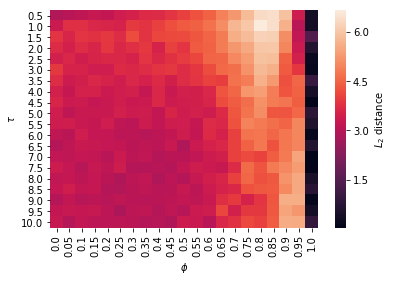

In [5]:
levels=['eps']
key=[0.05]

data, indices, ax_names = l_2_distance(micro_data, macro_data, observable='x')

fig = plt.figure()
ax = fig.add_subplot(111)

seaborn.heatmap(data,
                yticklabels=indices[ax_names[0]],
                xticklabels=[round(x, 3) for x in indices[ax_names[1]]],
                ax=ax,
                cbar_kws={'label': '$L_2$ distance'})
ax.set_ylabel(ax_names[0])
ax.set_xlabel(ax_names[1])


fig = ax.get_figure()
fig.savefig('heatmap.png')
fig.savefig('heatmap.pdf')

In [42]:
prt = plot_routines(base_path='/home/jakob/Project_Divestment/PyDivestment/output_data/P3/')

TypeError: __init__() got an unexpected keyword argument 'base_path'

In [11]:
tau = 5
for eps in [0.01, 0.05]:
    for phi in [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]:
        selection = {'tau': tau,
                     'phi': phi,
                     'eps': eps}
        figure = prt.mk_4plots(selection)
        figure.tight_layout()
        figure.savefig('trajectory_tau={:3.1f}_phi={:1.2f}_eps={:1.2f}.jpg'.format(tau, phi, eps))
        figure.clear()
        plt.close(figure)

c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
c exception
